### import the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# reading datasets
train = pd.read_csv('train.csv')

In [2]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### Drop missing values and Customer ID column

In [3]:
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [4]:
train.drop(columns='CustomerID',axis=1,inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [6]:
train = train.dropna()
train.shape

(440832, 11)

In [7]:
train.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### Show correlation matrix

In [8]:
df = train.copy()
Categorical_col = []
Numerical_col = []
for col in df.columns:
    if train[col].dtype == 'object':
        Categorical_col.append(col)

    else:
        Numerical_col.append(col)


print(Categorical_col)
for col in Categorical_col:
    print(df[col].unique())

['Gender', 'Subscription Type', 'Contract Length']
['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in Categorical_col:
    df[col] = LE.fit_transform(train[col])

df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


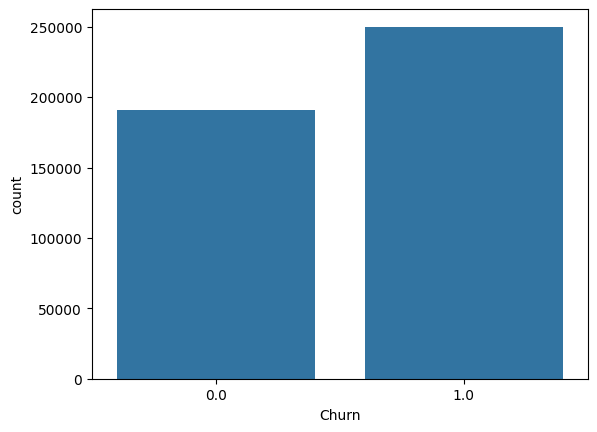

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.show()

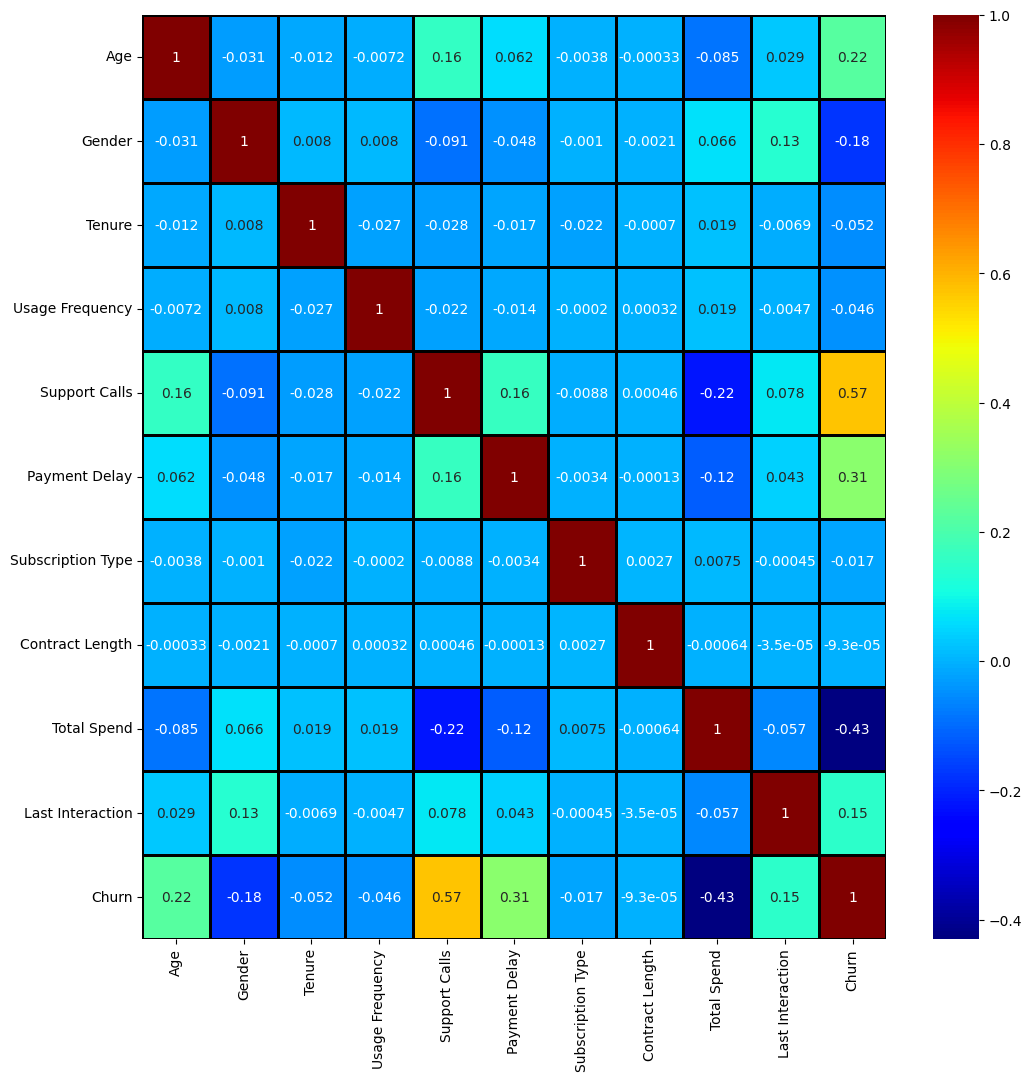

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='jet',linewidths=1, linecolor='black')
plt.show()

In [14]:
data = pd.get_dummies(train, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=False  )
data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,True,False,False,False,True,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,True,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,True,False,True,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,False,False,True,False,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,True,True,False,False,False,True,False


In [15]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn']
X

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,True,False,False,False,True,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,True,False,True,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,True,False,True,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,False,True,False,False,True,False,True,False
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,False,True,False,True,False,True,False,False
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,True,False,False,True,False,True,False,False
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,False,True,False,False,True,False,False,True
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,False,True,False,False,True,False,False,True


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34559  3504]
 [ 5628 44476]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     38063
         1.0       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167



### Save pickle model locally

In [18]:
# save model locally
import joblib
# Assuming the model variable contains the trained logistic regression model
model_file_path = 'logistic_regression_model.pkl'
joblib.dump(model, model_file_path)
print(f"Model saved to {model_file_path}")


Model saved to logistic_regression_model.pkl


### Tasting

Model loaded from logistic_regression_model.pkl


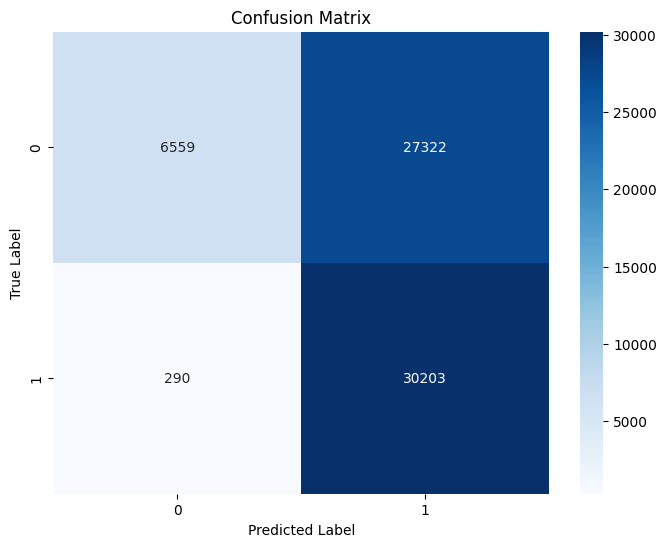

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374



In [26]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load the test dataset
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

# Load the saved model
model_file_path = 'logistic_regression_model.pkl'
model = joblib.load(model_file_path)
print("Model loaded from", model_file_path)

# Preprocess the test data (same steps as training data)
test_data = test_data.drop(['CustomerID'], axis=1)
test_data = test_data.dropna()
test_data = pd.get_dummies(test_data, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=False)


# Separate features and target variable from the test data
X_test_new = test_data.drop('Churn', axis=1)
y_test_new = test_data['Churn']

# Make predictions on the test set
y_pred_new = model.predict(X_test_new)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_new, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_new, y_pred_new))


### Apply the Equation

In [19]:
# Load the saved model
model_file_path = 'logistic_regression_model.pkl'
model2 = joblib.load(model_file_path)
print("Model loaded from", model_file_path)

Model loaded from logistic_regression_model.pkl


In [22]:
model2.coef_[0]

array([ 3.56050954e-02, -7.81598371e-03, -1.44813022e-02,  7.47388531e-01,
        1.12604421e-01, -6.04145939e-03,  6.06848924e-02,  1.04520599e+00,
       -1.03131796e-01,  3.93118615e-01,  2.72203004e-01,  2.76752578e-01,
       -3.17713262e+00,  7.29573059e+00, -3.17652378e+00])

In [29]:
model2.intercept_

array([0.94989546])

In [30]:
# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model2.coef_[0]
})
intercept = model2.intercept_[0]
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                       Feature  Coefficient
0                          Age     0.035580
1                       Tenure    -0.007825
2              Usage Frequency    -0.014494
3                Support Calls     0.747618
4                Payment Delay     0.112642
5                  Total Spend    -0.006044
6             Last Interaction     0.060728
7                Gender_Female     1.049915
8                  Gender_Male    -0.100057
9      Subscription Type_Basic     0.395383
10   Subscription Type_Premium     0.275734
11  Subscription Type_Standard     0.278741
12      Contract Length_Annual    -3.190748
13     Contract Length_Monthly     7.328623
14   Contract Length_Quarterly    -3.188017


In [31]:
# Form the logistic regression equation
equation = f"Logit(p) = {intercept:.4f}"
for idx, row in coefficients.iterrows():
    equation += f" + ({row['Coefficient']:.4f} * {row['Feature']})"
print("\nLogistic Regression Equation:")
print(equation)


Logistic Regression Equation:
Logit(p) = 0.9499 + (0.0356 * Age) + (-0.0078 * Tenure) + (-0.0145 * Usage Frequency) + (0.7476 * Support Calls) + (0.1126 * Payment Delay) + (-0.0060 * Total Spend) + (0.0607 * Last Interaction) + (1.0499 * Gender_Female) + (-0.1001 * Gender_Male) + (0.3954 * Subscription Type_Basic) + (0.2757 * Subscription Type_Premium) + (0.2787 * Subscription Type_Standard) + (-3.1907 * Contract Length_Annual) + (7.3286 * Contract Length_Monthly) + (-3.1880 * Contract Length_Quarterly)


In [35]:
# Example inference
example_data = {
    'Age': 30,
    'Tenure': 39, 
    'Usage Frequency': 14, 
    'Support Calls': 5, 
    'Payment Delay': 18,
    'Total Spend': 932, 
    'Last Interaction': 17, 
    'Gender_Female' : 1, 
    'Gender_Male': 0,
    'Subscription Type_Basic': 0, 
    'Subscription Type_Premium': 0,
    'Subscription Type_Standard': 1, 
    'Contract Length_Annual': 1,
    'Contract Length_Monthly': 0, 
    'Contract Length_Quarterly': 0
}

In [43]:
Logit = 0.9499 + (0.0356 * example_data['Age']) + (-0.0078 * example_data['Tenure']) + (-0.0145 * example_data['Usage Frequency']) + (0.7476 * example_data['Support Calls']) + (0.1126 * example_data['Payment Delay']) + (-0.0060 * example_data['Total Spend']) + (0.0607 * example_data['Last Interaction']) + (1.0499 * example_data['Gender_Female']) + (-0.1001 * example_data['Gender_Male']) + (0.3954 * example_data['Subscription Type_Basic']) + (0.2757 * example_data['Subscription Type_Premium']) + (0.2787 * example_data['Subscription Type_Standard']) + (-3.1907 * example_data['Contract Length_Annual']) + (7.3286 * example_data['Contract Length_Monthly']) + (-3.1880 * example_data['Contract Length_Quarterly'])
probability = 1 / (1 + np.exp(-Logit))
probability

0.7012589342793311

In [42]:
# Inference function
def predict_churn(input_data):
    df = pd.DataFrame(input_data, index=[0])
    df = df.reindex(columns=X_train.columns, fill_value=0)
    # Get predicted class and probability of churn
    prediction = model.predict(df)
    probability = model.predict_proba(df)[:, 1]  # Probability of the positive class (churn)

    return prediction[0], probability[0]


print("Predicted Churn:", predict_churn(example_data))

Predicted Churn: (1.0, 0.692561017615707)
